# Confidence interval

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#-------------------
import scipy.stats as stats
import statistics

In [2]:
# read data and create DataFram
path = "D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe"
dir_list = os.listdir(path)
variable_names = dir_list.copy()
for i in range(len(variable_names)):
    variable_names[i] = variable_names[i].replace(".csv","")

file_names = dir_list

for var_name, file_name in zip(variable_names, file_names):
    print(f"name {var_name}    and file {var_name}")
    globals()[var_name] = pd.read_csv(f'D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe/{file_name}').drop("Unnamed: 0", axis=1)


name album    and file album
name artist    and file artist
name customer    and file customer
name employee    and file employee
name genre    and file genre
name invoice    and file invoice
name invoiceline    and file invoiceline
name mediatype    and file mediatype
name playlist    and file playlist
name playlisttrack    and file playlisttrack
name track    and file track


Is the length of songs the same in different genres? Calculate their 95% confidence interval for the mean length of songs in each genre

In [6]:
track.groupby('GenreId').avg()

AttributeError: 'DataFrameGroupBy' object has no attribute 'avg'

In [ ]:
np.count

In [14]:
track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2526 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


In [64]:
genre[genre['GenreId']==21]

,GenreId,Name
20,21,Drama


In [59]:
a = track[['TrackId', 'GenreId','Milliseconds']]
(a[a['GenreId']==18]['Milliseconds'])

2818    2622250
2824    2563938
2825    2713755
2826    2622038
2827    2623875
2828    2618750
2829    2624541
2830    2624207
2831    2626376
2832    2620245
2833    2627961
2834    2622372
2835    2621830
Name: Milliseconds, dtype: int64

    GenreId  count_track   avg_time
0         1         1297   4.731834
1         2          130   4.862590
2         3          374   5.162491
3         4          332   3.905897
4         5           12   2.244058
5         6           81   4.505996
6         7          579   3.880988
7         8           58   4.119629
8         9           48   3.817235
9        10           43   4.072848
10       11           15   3.659833
11       12           24   3.152737
12       13           28   4.957549
13       14           61   3.667781
14       15           30   5.049763
15       16           28   3.748730
16       17           35   2.969605
17       18           13  43.759151
18       19           93  35.750684
19       20           26  48.529717
20       21           64  42.921396
21       22           17  26.421062
22       23           40   4.400975
23       24           74   4.897793
24       25            1   2.913550


<Axes: xlabel='avg_time', ylabel='Count'>

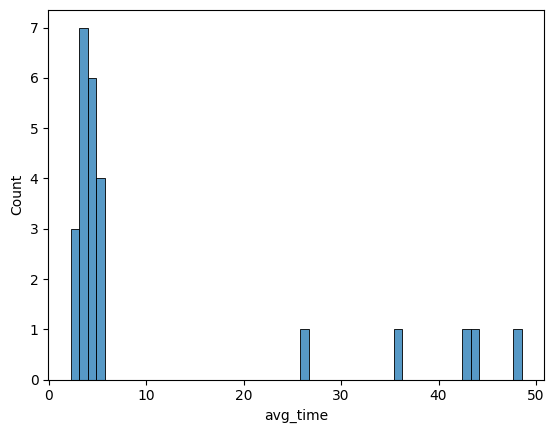

In [61]:
genre_count_track_avrage_time = (track[['TrackId', 'GenreId','Milliseconds']].groupby('GenreId')
                                .agg(count_track=('TrackId',np.count_nonzero),
                                    avg_time = ('Milliseconds', np.average))
                                    .reset_index())

genre_count_track_avrage_time['avg_time'] = genre_count_track_avrage_time['avg_time']/60000
print(genre_count_track_avrage_time)

sns.histplot(genre_count_track_avrage_time['avg_time'])